<IPython.core.display.Javascript object>


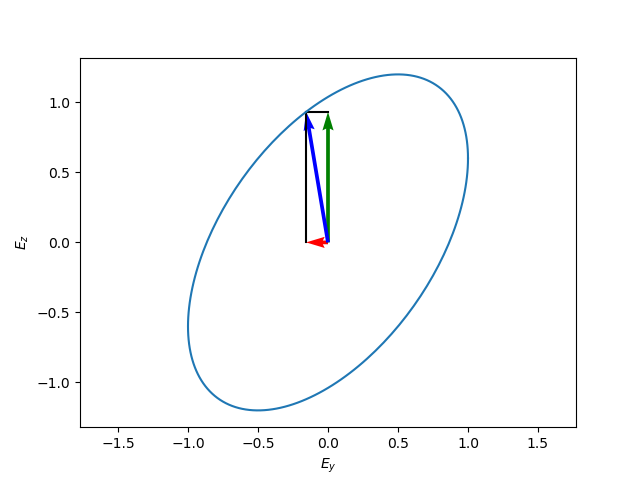

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update(i):
    global Ey, Ez, theta, fig
    
    plt.cla()

    # 電界ベクトルを表す矢印の描画
    dth = theta * np.pi / 180
    dt = np.pi / 20
    t = i*dt
    ey = Ey * np.cos(t)
    ez = Ez * np.cos(t - dth)
    X = [0, 0, 0]
    Y = [0, 0, 0]
    U = [ey, 0, ey]
    V = [0, ez, ez]
    color = ('red', 'green', 'blue')
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=color)

    # 電界ベクトルの先端が描く楕円の描画
    orbit_dt = np.pi / 100
    orbit_t = np.arange(0, 2*np.pi+orbit_dt, orbit_dt)
    orbit_y = Ey * np.cos(orbit_t)
    orbit_z = Ez * np.cos(orbit_t - dth)
    plt.plot([ey, ey], [0, ez], 'k',  [0, ey], [ez, ez], 'k', orbit_y, orbit_z)
    
    # 座標軸の設定
    plt.axis('equal')
    plt.xlim([-1.1*Ey, 1.1*Ey])
    plt.ylim([-1.1*Ez, 1.1*Ez])
    plt.xlabel(r'$E_y$')
    plt.ylabel(r'$E_z$')

    
    
if __name__ == '__main__':
    #
    # 必要に応じて変更するパラメータ
    #
    # Ey : 電界のy成分の振幅
    # Ez : 電界のz成分の振幅
    # theta : 電界のy成分とz成分の位相差，単位は度
    Ey = 1
    Ez = 1.5
    theta = -60

    # 描画の開始
    fig = plt.figure()
    ani = animation.FuncAnimation(fig, update, interval=100)
